In [1]:
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

import keras
from keras.models import Sequential  #sequential is required to initialise the neural network
from keras.layers import Dense  #dense is used to build the layers
from keras.layers import Dropout  #Dropout Layer in order to prevent Regularization in the network

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset_file = "./stressSensorGait_dataset/normal_gait.csv"
gait = pd.read_csv(dataset_file)

In [3]:
x=gait.iloc[:,0:4]
y=gait.iloc[:,4:5]

print(x.head())
print(y.head())

   sensor1  sensor2  sensor3  sensor4
0      512      513      492      454
1      516      504      485      481
2      517      495      480      487
3      518      489      476      490
4      517      483      474      494
  labels
0   walk
1   walk
2   walk
3   walk
4   walk


In [4]:
mu = np.mean(x, axis=0)
sigma = np.std(x, axis=0)
x = (x - mu) / sigma

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(x,
                                                y,
                                                test_size=0.2,
                                                random_state=42)

In [6]:
le = preprocessing.LabelEncoder()
ytrain = le.fit_transform(ytrain.values.ravel())
ytest = le.fit_transform(ytest.values.ravel())

In [7]:
model = Sequential()
model.add(Dense(
    640,
    input_dim=4,
    activation='relu',
))
#creating a network of 561 X 48 X 24 X 12 X6
model.add(Dropout(0.1))
model.add(Dense(320, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(160, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(5, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 640)               3200      
                                                                 
 dropout (Dropout)           (None, 640)               0         
                                                                 
 dense_1 (Dense)             (None, 320)               205120    
                                                                 
 dropout_1 (Dropout)         (None, 320)               0         
                                                                 
 dense_2 (Dense)             (None, 160)               51360     
                                                                 
 dropout_2 (Dropout)         (None, 160)               0         
                                                                 
 dense_3 (Dense)             (None, 80)                1

In [9]:
model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

In [10]:
history1 = model.fit(xtrain, ytrain, batch_size=64, epochs=1000)

Epoch 1/1000
76/76 [==============================] - 2s 6ms/step - loss: 1.0610 - accuracy: 0.5377
Epoch 2/1000
76/76 [==============================] - 0s 4ms/step - loss: 0.6080 - accuracy: 0.7570
Epoch 3/1000
76/76 [==============================] - 0s 4ms/step - loss: 0.5022 - accuracy: 0.8119
Epoch 4/1000
76/76 [==============================] - 0s 4ms/step - loss: 0.4543 - accuracy: 0.8352
Epoch 5/1000
76/76 [==============================] - 0s 5ms/step - loss: 0.4047 - accuracy: 0.8523
Epoch 6/1000
76/76 [==============================] - 0s 5ms/step - loss: 0.3764 - accuracy: 0.8564
Epoch 7/1000
76/76 [==============================] - 0s 4ms/step - loss: 0.3574 - accuracy: 0.8711
Epoch 8/1000
76/76 [==============================] - 0s 4ms/step - loss: 0.3323 - accuracy: 0.8777
Epoch 9/1000
76/76 [==============================] - 0s 4ms/step - loss: 0.3118 - accuracy: 0.8878
Epoch 10/1000
76/76 [==============================] - 0s 4ms/step - loss: 0.3162 - accuracy: 0.8901

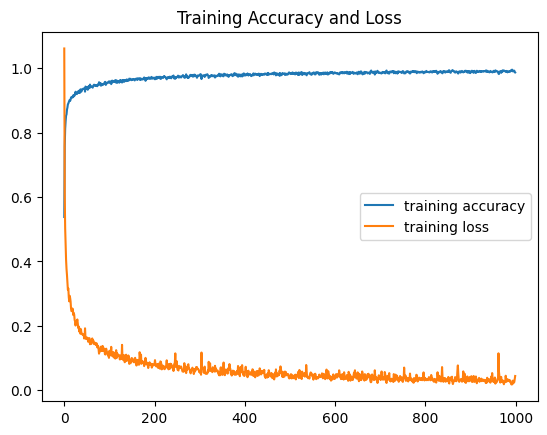

In [11]:
#train set acc and loss
acc = history1.history['accuracy']
loss = history1.history['loss']
plt.subplot()
plt.plot(acc, label='training accuracy')
plt.plot(loss, label='training loss')
plt.title('Training Accuracy and Loss')
plt.legend()

image_path1 = './image/annNormalGaitTrainACCAndLoss.jpg'
plt.savefig(image_path1, dpi=500, bbox_inches='tight')

In [13]:
history2=model.fit(xtest, ytest, batch_size=64, epochs=100) 

Epoch 1/100
19/19 [==============================] - 0s 7ms/step - loss: 0.3936 - accuracy: 0.9439
Epoch 2/100
19/19 [==============================] - 0s 7ms/step - loss: 0.1953 - accuracy: 0.9464
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 0.1406 - accuracy: 0.9497
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 0.1236 - accuracy: 0.9530
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 0.1076 - accuracy: 0.9596
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 0.1177 - accuracy: 0.9646
Epoch 7/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0845 - accuracy: 0.9728
Epoch 8/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0854 - accuracy: 0.9703
Epoch 9/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0789 - accuracy: 0.9711
Epoch 10/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0702 - accuracy: 0.9769
Epoch 11/

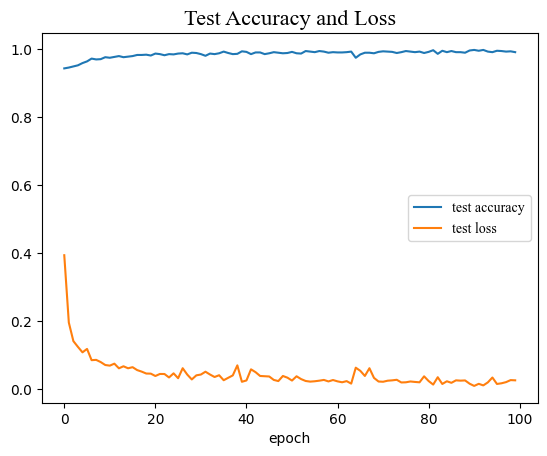

In [14]:
acc = history2.history['accuracy']
loss = history2.history['loss']

plt.subplot()
font='Times New Roman'

plt.xlabel("epoch")
plt.rc('font',family='Times New Roman')
plt.plot(acc, label='test accuracy')
plt.plot(loss, label='test loss')
plt.title('Test Accuracy and Loss',fontdict={'family' : 'Times New Roman', 'size'   : 16})
plt.legend()

image_path2 = './image/annNormalGaitTestACCAndLoss.jpg'
plt.savefig(image_path2, dpi=500, bbox_inches='tight')

In [16]:
loss,accuracy = model.evaluate(xtest,ytest)

38/38 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 0.9967


In [17]:
# save model 
model.save("./model/annModel.h5")

In [18]:
y_pred=np.argmax(model.predict(xtest), axis=-1)
y_true=ytest

38/38 [==============================] - 0s 2ms/step


In [20]:
y_pred_test = model.predict(xtest)

matrix = metrics.confusion_matrix(y_pred, y_true)

38/38 [==============================] - 0s 2ms/step


In [21]:
labels = ["walk","run","jump","Upstairs", "Downstairs"]

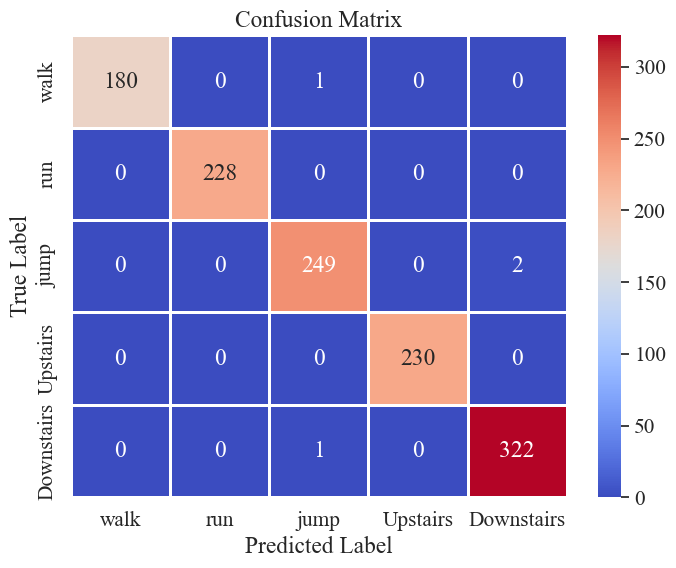

In [22]:
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid",font='Times New Roman',font_scale=1.4)
sns.heatmap(matrix,
            cmap="coolwarm",
            linecolor='white',
            linewidths=1,
            xticklabels=labels,
            yticklabels=labels,
            annot=True,
            fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

image_path3 = './image/annNormalGaitConfusionMatrix.jpg'
plt.savefig(image_path3, dpi=500, bbox_inches='tight')  #sava image
plt.show()